In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

colorlist = ['darkorange', 'cyan', 'lightsteelblue', 'plum', 'darkseagreen', 'gold', 'bisque', 'lightgreen', 'gray']
color_rgb_list = [(74/255, 135/255, 161/255), (222/255, 144/255, 123/255), (230/255, 197/255, 180/255), (88/255, 141/255, 106/255), (147/255, 196/255, 212/255), (237/255, 204/255, 134/255), (156/255, 131/255, 131/255), (116/255, 126/255, 73/255), (61/255, 71/255, 59/255), (36/255, 74/255, 96/255)]

def extract_number(feature, data, split_str):
    result_list = []
    for line in data:
        #print(line)
        seg = re.split(split_str, line)
        if set(feature).issubset(set(seg)):
            for item in seg:
                if item.lstrip('-').replace('.', '').replace(',', '').isdigit():
                    item = item.replace(',', '')
                    try:
                        result_list.append(int(item))  
                    except ValueError:
                        result_list.append(float(item))  
                        
    return result_list
                
def process_log(root_path, log_path, steps_feature = ['components'], \
                steps_split = ' |\n', val_split = ' |\n|\)|\(|%', val_features = ['set:', 'Accuracy:', 'Test']):
    with open(root_path + log_path, 'r') as f:
        data = f.readlines()
        steps_list = extract_number(feature = steps_feature, data = data, split_str = steps_split)
        val_list = extract_number(feature = val_features, data = data, split_str = val_split) 
    
    
    if abs(len(steps_list) -  len(val_list)) == 1:
        min_len = min(len(steps_list), len(val_list))
        return steps_list[:min_len], val_list[:min_len]
    else:
        return steps_list, val_list

def process_smooth(steps_list, val_list, smooth_len):
    steps = [0] * len(range(0, len(steps_list)-smooth_len+1, smooth_len))
    vals = [0] * len(steps)
    for i in range(0, len(steps_list)-smooth_len+1, smooth_len):
        steps[i // smooth_len]  = steps_list[i+np.argmin(val_list[i:i+smooth_len])]
        vals[i // smooth_len] = np.min(val_list[i:i+smooth_len])
    return steps, vals

In [2]:
def smooth(r_list,plot_list_len,smooth_len):
    plot_list = []
    for i in range(plot_list_len):
        plot_list.append(np.mean(r_list[i*smooth_len:(i+1)*smooth_len]))
    return plot_list

<IPython.core.display.Javascript object>


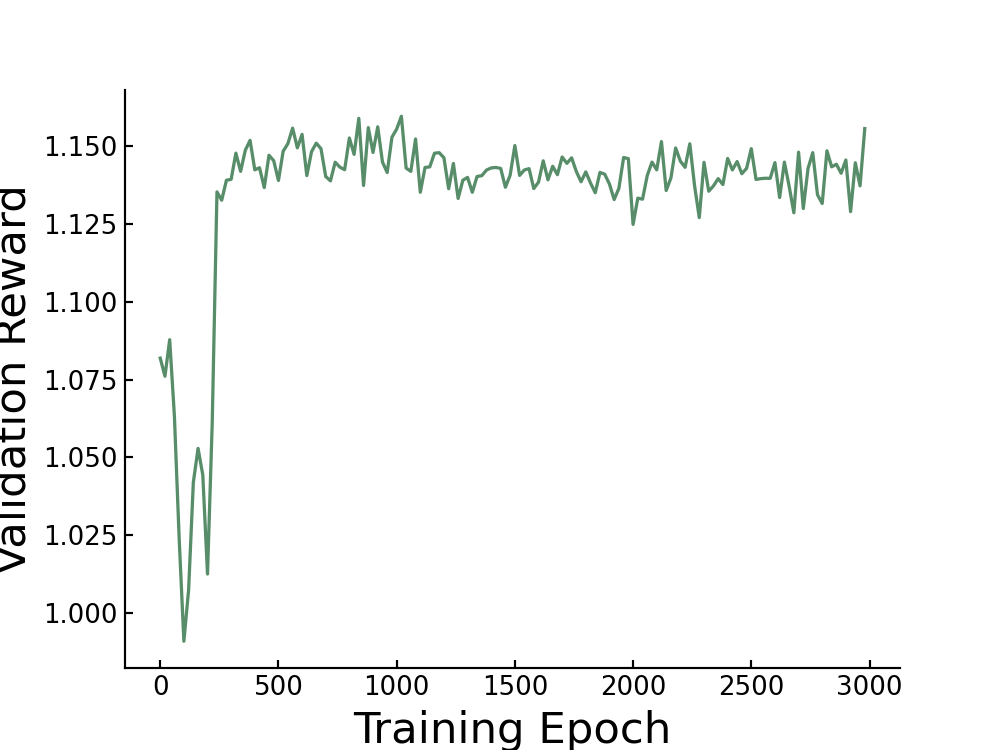

In [661]:
with open(r'log/' + 'A2C2022-12-18-12-29-59', 'r') as f:
    data = f.readlines()
    result_list = []
    for line in data:
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg))

now=3000
smooth_len = 20
x = np.arange(0,now,1*smooth_len)
y = smooth(result_list[:len(x)*smooth_len],len(x),smooth_len)
steps = np.arange(0,now,1*smooth_len)
plt.figure()
ax = plt.gca().axes

plt.plot(steps,y/min_,color=color_rgb_list[3])
#plt.plot(x,[86.5]*len(x))


plt.xlabel("Training Epoch",size=20)
plt.ylabel('Validation Reward',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig(r'plot/'+'rlA2C2022-12-17-18-44-56'+'steps_'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()

In [456]:
np.array([[1,2],[3,3]]).mean(0)

array([2. , 2.5])

In [89]:
3.8726*(0.999**30000)

3.5698454998557403e-13

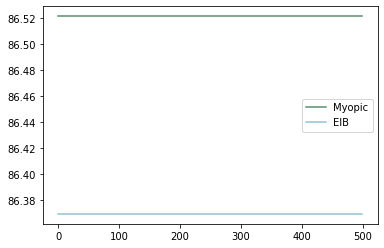

In [102]:
#看benchmark的平均表现
with open(r'log/' + 'A2C2022-11-20-10-25-48', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

smooth_len = 3
#x = np.arange(0,int(2000 / 100)*20,5*smooth_len)
#y = smooth(result_list[:len(x1)*smooth_len],len(x1),smooth_len)
#plt.plot(x,y)
len_ = len(OA_list)
x = np.arange(len_)
#plt.plot(x,[np.mean(OA_list)]*len_,color=color_rgb_list[1])
plt.plot(x,[np.mean(Myopic_list)]*len_,color=color_rgb_list[3],label='Myopic')
plt.plot(x,[np.mean(EIB_list)]*len_,color=color_rgb_list[4],label='EIB')
plt.legend()

<IPython.core.display.Javascript object>


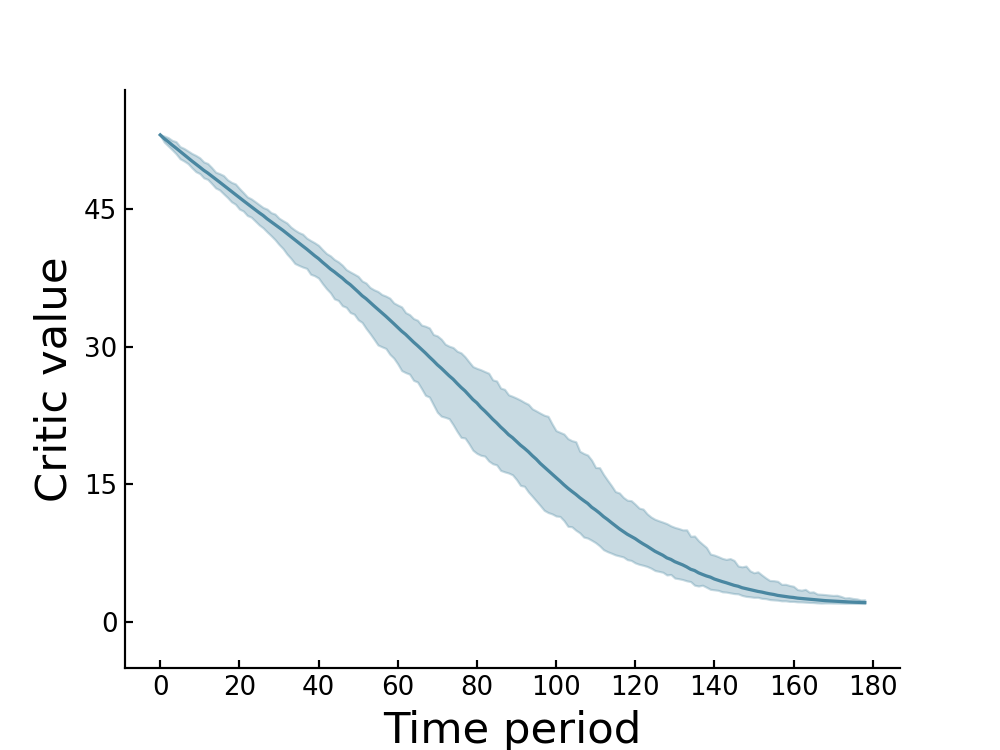

In [663]:
#看value function的变化趋势 A2C2022-11-21-10-42-59

value_list = [86.89658343615095, 86.10397570216101, 85.35042921908592, 84.42253288650723, 83.38088149935189, 82.18086391968377, 81.06664218799821, 79.75143644723626, 78.56741630220915, 77.24911000164518, 76.00625297582678, 74.83925337063864, 73.59777638508277, 72.42419681077308, 71.2472093888563, 69.9519923965245, 68.71569549733803, 67.27920971521756, 66.10096303740724, 64.89195223869105, 63.83174880687191, 62.49764345714972, 61.19268464778215, 60.01111249856044, 59.085931170611865, 57.74544479993433, 56.617081943749, 55.287287173142275, 53.90028447484984, 52.58747294651259, 51.213867438987315, 49.83693120518892, 48.354398549432894, 47.12338907692597, 45.624344303294535, 44.34808207419302, 43.20403018366949, 42.10497160339768, 40.59360845707205, 39.80082382527054, 38.65586242274874, 37.39347424303277, 36.068577913247225, 35.044377017492266, 33.83160589935764, 32.511207264707615, 31.430489683093366, 30.278969440800914, 29.19856357669314, 28.232373386383152, 27.106087305379265, 26.210228729182425, 25.20675368573442, 24.191609561031004, 23.203118551268574, 22.33955139657794, 21.462421819833377, 20.658269435697942, 19.947433113010355, 19.037186022665022, 18.365190423253114, 17.7956069153228, 17.13769356100294, 16.665902977934007, 16.09844292032932, 15.674712144422397, 15.14472528601251, 14.519440071151973, 14.183715754341739, 13.730809027576802, 13.396828887746306, 12.96701006462413, 12.347297736895786, 11.78448122442158, 11.401936791347955, 11.011284841727313, 10.633278079469978, 10.114497968206587, 9.62013156298735, 9.304098483047552, 9.015466506961504, 8.588261660073579, 8.262198390151703, 7.93486485268353, 7.575186334170567, 7.373132511763217, 6.996776004655004, 6.760012703306707, 6.493906107053782, 6.152423992844887, 5.999173641054043, 5.852814219516828, 5.68304830200321]
plt.figure()
#plt.figure(figsize=(8,5))
ax = plt.gca().axes
l_list = np.zeros(len(change_of_value[0]))
for l in change_of_value:
    l_list = np.vstack((l_list,l))
l_list=l_list[1:]
down = np.min(l_list,axis=0)
up = np.max(l_list,axis=0)
plt.fill_between(np.arange(len(change_of_value[0])), down, up, alpha=0.3, color=color_rgb_list[0])
mean_ = np.mean(l_list,axis=0)
plt.plot(np.arange(len(change_of_value[0])),mean_,color=color_rgb_list[0])

'''for l in change_of_value:
    x = np.arange(len(l))
    plt.plot(x,l,color=color_rgb_list[0])'''

#ax.grid(True)
#ax.grid(color=(102/255,216/255,219/255), linestyle='--', linewidth=1,alpha=0.3)

plt.xlabel("Time period",size=20)
plt.ylabel('Critic value',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
y_major_locator=MultipleLocator(15)
ax.yaxis.set_major_locator(y_major_locator)
ax.set_ylim(-5,58)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)
#plt.title('HOW valuation of current state changes in a selling season ',size=15)


plt.savefig(r'change/'+'A2C2022-12-18-15-24-59'+'Value'+'.pdf', dpi=600, format='pdf')
plt.show()

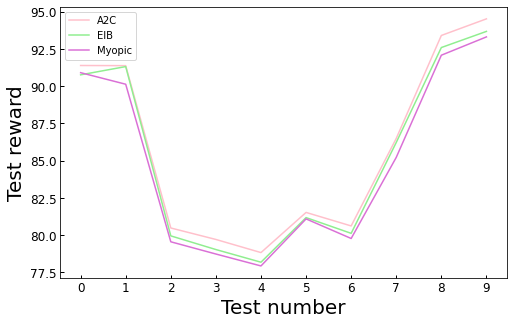

In [223]:
#多次test，每一次A2C都表现得最好
with open(r'log/' + 'A2C2022-11-21-11-09-43', 'r') as f:
    data = f.readlines()
    A2C_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            A2C_list.append(float(line.split(',')[-4][-7:]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))


len_ = len(A2C_list)
x = np.arange(len_)

plt.figure(figsize=(8,5))
ax = plt.gca().axes
plt.plot(x,A2C_list,color='pink',label='A2C')
plt.plot(x,EIB_list,color='lightgreen',label='EIB')
plt.plot(x,Myopic_list,color='orchid',label='Myopic')
plt.legend()
plt.xlabel("Test number",size=20)
plt.ylabel('Test reward',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')

In [623]:
change_of_invA2C = np.load('change/'+'A2C2022-12-18-15-24-59change_of_inv_list.npy',allow_pickle=True)
change_of_RA2C = np.load('change/'+'A2C2022-12-18-15-24-59change_of_R_list.npy',allow_pickle=True)
change_of_value = np.load('change/'+'A2C2022-12-18-15-24-59test_value_list.npy',allow_pickle=True)
change_of_invA2C
change_of_RA2C
len(change_of_value)

50

In [624]:
change_of_ROA = np.load('change/'+'A2C2022-12-18-15-24-59change_of_ROA_list.npy',allow_pickle=True)
change_of_RM = np.load('change/'+'A2C2022-12-18-15-24-59change_of_RM_list.npy',allow_pickle=True)
change_of_RE = np.load('change/'+'A2C2022-12-18-15-24-59change_of_RE_list.npy',allow_pickle=True)

change_of_invOA = np.load('change/'+'A2C2022-12-18-15-24-59change_of_invOA_list.npy',allow_pickle=True)
change_of_invM = np.load('change/'+'A2C2022-12-18-15-24-59change_of_invM_list.npy',allow_pickle=True)
change_of_invE = np.load('change/'+'A2C2022-12-18-15-24-59change_of_invE_list.npy',allow_pickle=True)


In [625]:
change_of_invA2C[0]

array([[10.  , 10.  , 10.  , ..., 10.  , 10.  , 10.  ],
       [10.  ,  9.6 ,  9.96, ..., 10.  , 10.  , 10.  ],
       [10.  ,  9.38,  9.66, ..., 10.  , 10.  , 10.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  4.7 ,  5.18,  8.66],
       [ 0.  ,  0.  ,  0.  , ...,  4.7 ,  5.18,  8.66],
       [ 0.  ,  0.  ,  0.  , ...,  4.7 ,  5.18,  8.66]])

In [627]:
change_of_invA2C_min=change_of_invA2C.min(0)
change_of_invA2C_max=change_of_invA2C.max(0)
change_of_invA2C = change_of_invA2C.mean(0)

change_of_invOA_min=change_of_invOA.min(0)
change_of_invOA_max=change_of_invOA.max(0)
change_of_invOA = change_of_invOA.mean(0)

change_of_invM_min=change_of_invM.min(0)
change_of_invM_max=change_of_invM.max(0)
change_of_invM = change_of_invM.mean(0)

change_of_invE_min=change_of_invE.min(0)
change_of_invE_max=change_of_invE.max(0)
change_of_invE = change_of_invE.mean(0)

In [525]:
change_of_RE.mean(0).shape

(178,)

<IPython.core.display.Javascript object>


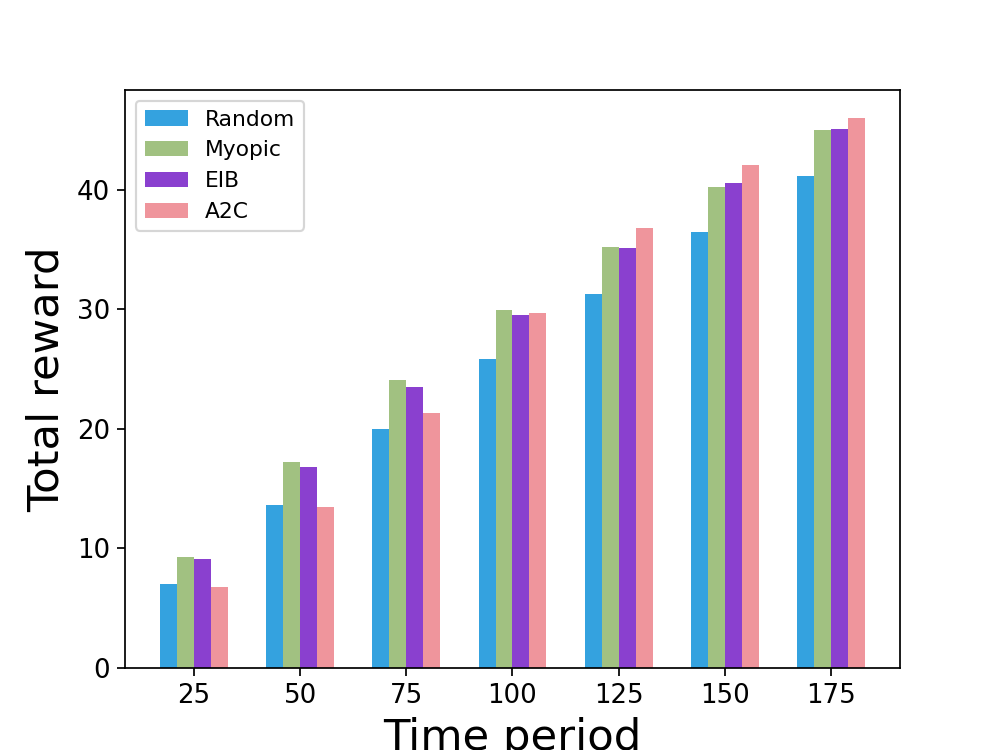

In [684]:
fig = plt.figure()
x = np.arange(len(change_of_ROA.mean(0)))[25::25]
#8ECFC9
#FFBE7A
#FA7F6F
#82B0D2
colors = ['#edae49', '#d1495b', '#00798c', '#003d5b']
colors = ['#34a2df', '#a1c181', '#8a40cf','#ef959c']
#colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261']
#添加子图区域
ax = plt.gca().axes
#绘制柱状图
ax.bar(x - 6, change_of_ROA.mean(0)[25::25], color = colors[0], width = 4,label='Random')
ax.bar(x -2, change_of_RM.mean(0)[25::25], color = colors[1], width = 4,label='Myopic')
ax.bar(x + 2, change_of_RE.mean(0)[25::25], color = colors[2], width = 4,label='EIB')
ax.bar(x + 6, change_of_RA2C.mean(0)[25::25], color = colors[3], width = 4,label='A2C')


plt.legend()
plt.xlabel("Time period",size=20)
plt.ylabel('Total reward',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
#ax.tick_params(direction='in', width=1)
plt.savefig(r'change/'+'A2C2022-12-18-15-24-59total_R'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()

/tmp/ipykernel_1502297/3613045928.py:4: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:5: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:6: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


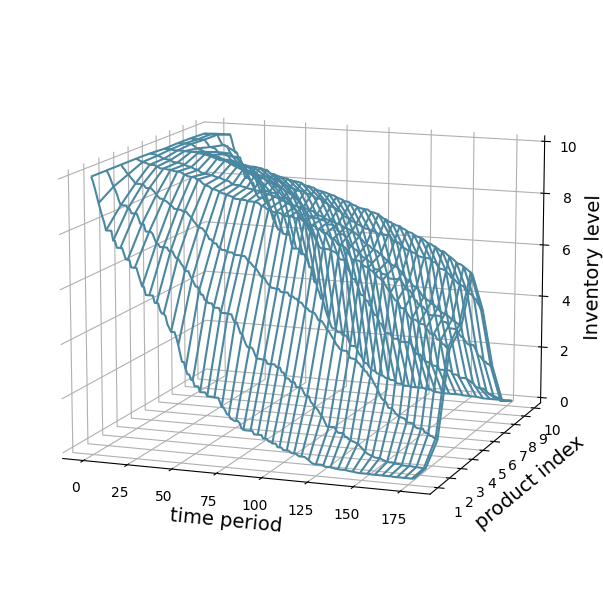

/tmp/ipykernel_1502297/3613045928.py:31: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:32: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:33: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


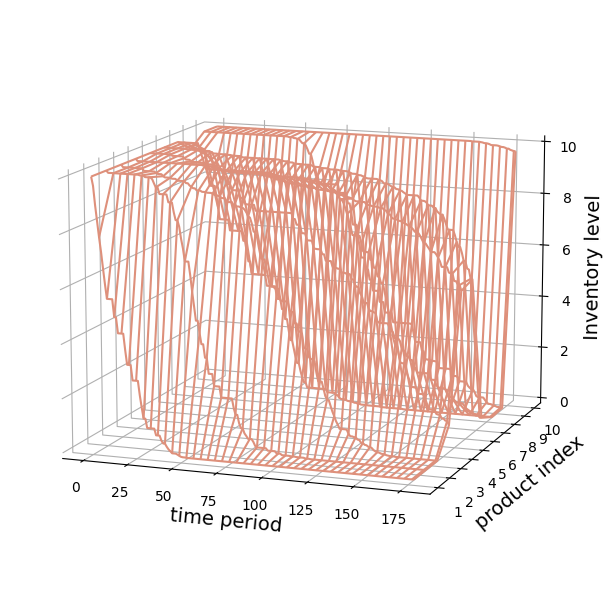

/tmp/ipykernel_1502297/3613045928.py:58: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:59: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:60: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


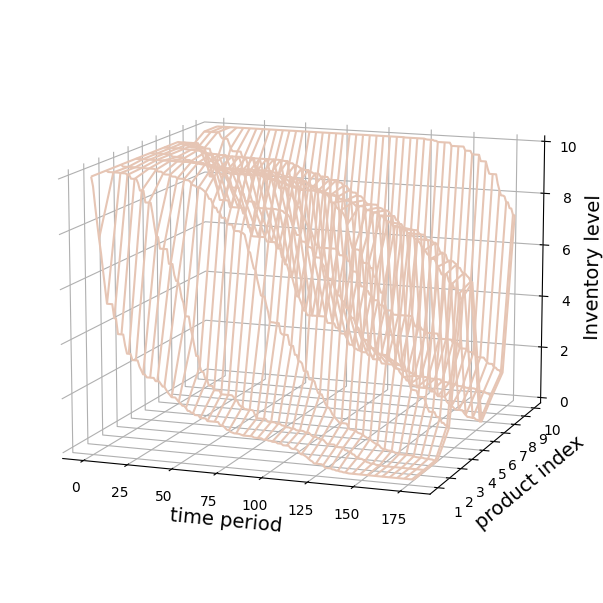

/tmp/ipykernel_1502297/3613045928.py:85: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:86: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/tmp/ipykernel_1502297/3613045928.py:87: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


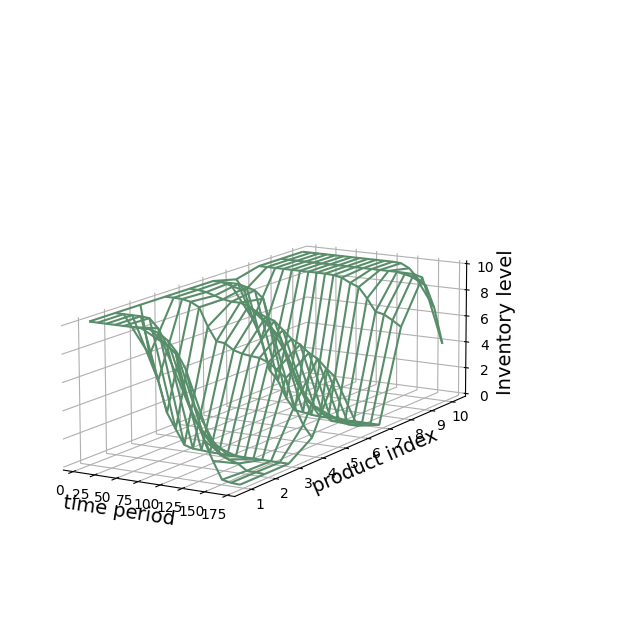

In [217]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(projection = '3d')
#底换成白色的
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# set figure information
ax.set_xlabel("time period",fontsize=14)
ax.set_ylabel("product index",fontsize=14)
ax.set_zlabel("Inventory level",fontsize=14)
#ax.grid(False)
y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

len_ = len(change_of_invOA)
ax.plot_wireframe(np.repeat(np.arange(1,len_+1)[np.newaxis,:],10,0), np.repeat(np.arange(1,11),len_,0).reshape(10,len_),change_of_invOA.T
                 ,color=color_rgb_list[0])

ax.view_init(12, -70)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.subplots_adjust(bottom=0.15)
#plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')
plt.show()

#############################################################################################################################################

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(projection = '3d')
#底换成白色的
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# set figure information
ax.set_xlabel("time period",fontsize=14)
ax.set_ylabel("product index",fontsize=14)
ax.set_zlabel("Inventory level",fontsize=14)
#ax.grid(False)
y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

len_ = len(change_of_invOA)
ax.plot_wireframe(np.repeat(np.arange(1,len_+1)[np.newaxis,:],10,0), np.repeat(np.arange(1,11),len_,0).reshape(10,len_),change_of_invM.T
                 ,color=color_rgb_list[1])

ax.view_init(12, -70)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.subplots_adjust(bottom=0.15)
#plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')
plt.show()

#############################################################################################################################################

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(projection = '3d')
#底换成白色的
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# set figure information
ax.set_xlabel("time period",fontsize=14)
ax.set_ylabel("product index",fontsize=14)
ax.set_zlabel("Inventory level",fontsize=14)
#ax.grid(False)
y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

len_ = len(change_of_invOA)
ax.plot_wireframe(np.repeat(np.arange(1,len_+1)[np.newaxis,:],10,0), np.repeat(np.arange(1,11),len_,0).reshape(10,len_),change_of_invE.T
                 ,color=color_rgb_list[2])

ax.view_init(12, -70)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.subplots_adjust(bottom=0.15)
#plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')
plt.show()

#############################################################################################################################################

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(projection = '3d')
#底换成白色的
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#ax.grid(False)
y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

len_ = len(change_of_invOA)
ax.plot_wireframe(np.repeat(np.arange(1,len_+1)[np.newaxis,:],10,0)[:,::10], np.repeat(np.arange(1,11),len_,0).reshape(10,len_)[:,::10],change_of_invA2C.T[:,::10]
                 ,color=color_rgb_list[3])
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1.2, 0.5, 1]))
ax.view_init(12, -60)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数

ax.set_xlabel("time period",fontsize=14)
ax.set_ylabel("product index",fontsize=14)
ax.set_zlabel("Inventory level",fontsize=14)
#plt.subplots_adjust(bottom=0.15)
#plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')
plt.show()

<IPython.core.display.Javascript object>


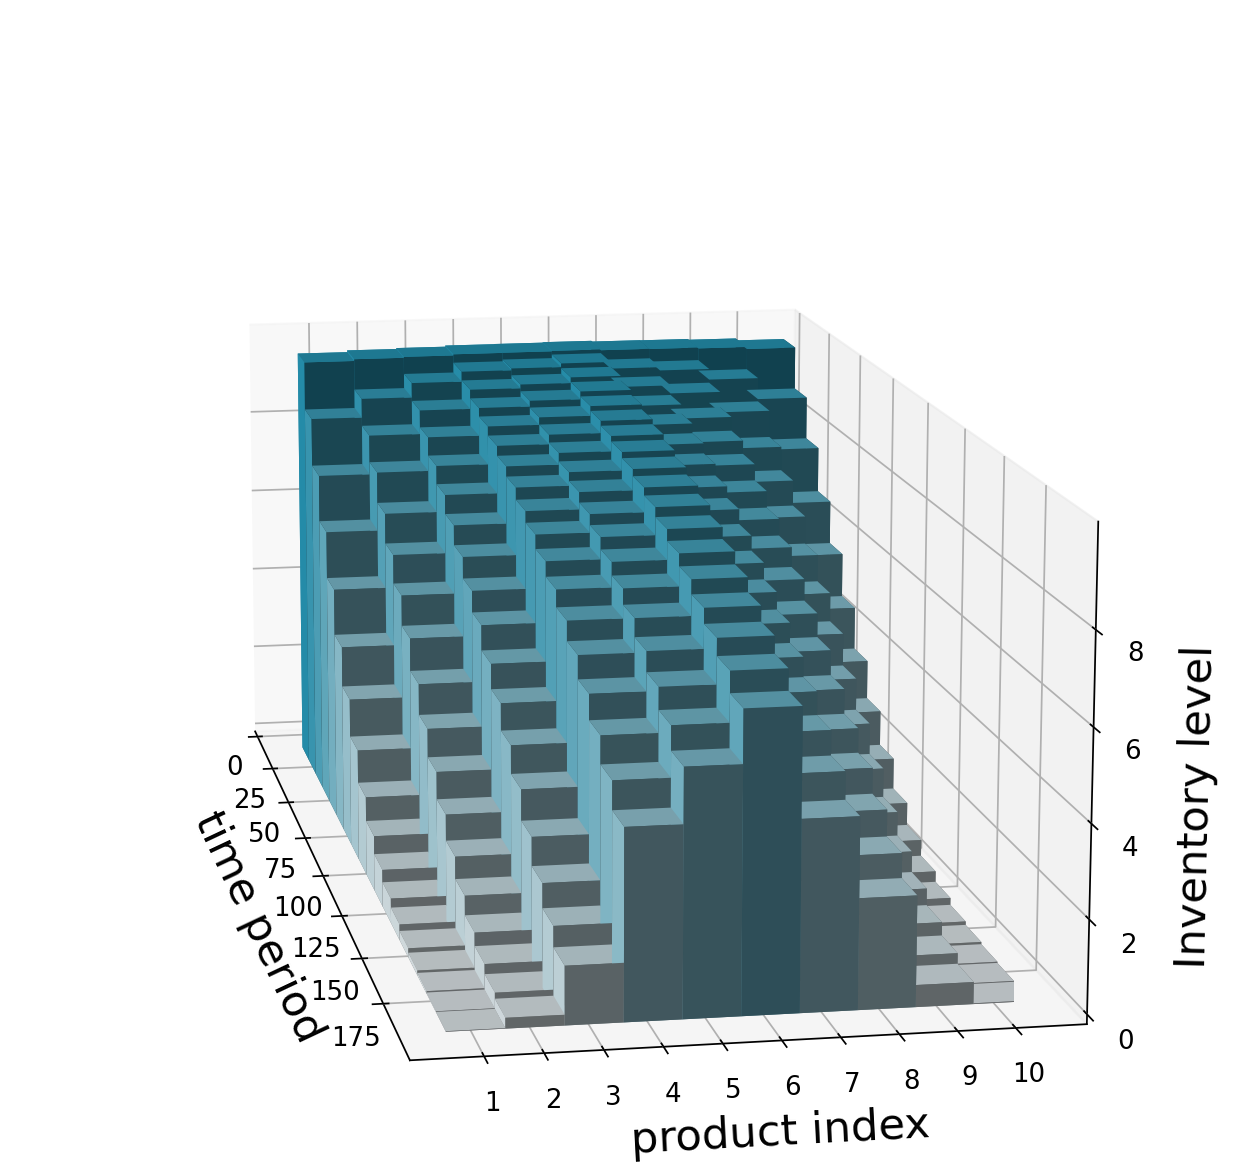

In [619]:
%matplotlib notebook
# 绘图设置
fig = plt.figure(figsize=(8,7.5))
ax = fig.add_subplot(projection = '3d')  # 三维坐标轴
# X和Y的个数要相同
X = list(range(1,change_of_invOA.T.shape[1]+1,10))
len_ = len(X)
Y = list(range(1,11))
# meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
xx, yy = np.meshgrid(X, Y)  # 网格化坐标
X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
# 设置柱子属性
depth = 1 # 柱子的长和宽
width = 10
#for i in range(10):
Z = change_of_invOA.T[:,::10].ravel()
height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置2ca02c
# 颜色数组，长度和Z一致
c = ["#9467bd"]*len_+["#ff7f0e"]*len_+["#c20078"]*len_+["#c79fef"]*len_+\
["#1f77b4"]*len_+["#069af3"]*len_+["#13eac9"]*len_+["#7af9ab"]*len_+["#6b8ba4"]*len_+["#40a368"]*len_
# 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
color_ = []
for h in Z:
    color_.append(((238-h*20)/255,(246-h*9)/255,(249-h*6)/255))
ax.bar3d(X+15, Y-0.5, height, width, depth, Z,  color=color_, shade=True)  # width, depth, height

y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.set_xlim(0,200)
ax.tick_params(axis='x',labelsize=12,pad=1)
ax.tick_params(axis='y',labelsize=12,pad=0)
ax.tick_params(axis='z',labelsize=12,pad=0)
ax.set_ylim(0,11)
plt.xticks(np.arange(0,200,25))
plt.yticks(np.arange(1,11,1))
#拉伸轴的长度
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 1, 1, 1]))

ax.set_xlabel("time period",fontsize=20, labelpad=2)#labelpad用于调整标签到x轴之间的距离，越大则标签离轴越远
ax.set_ylabel("product index",fontsize=20, labelpad=0)
ax.set_zlabel("Inventory level",fontsize=20, labelpad=0)
plt.subplots_adjust(left=0)
ax.view_init(12, -10)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.savefig(r'change/'+'rl_InvOA'+'.pdf', dpi=600, format='pdf')
plt.show()


<IPython.core.display.Javascript object>


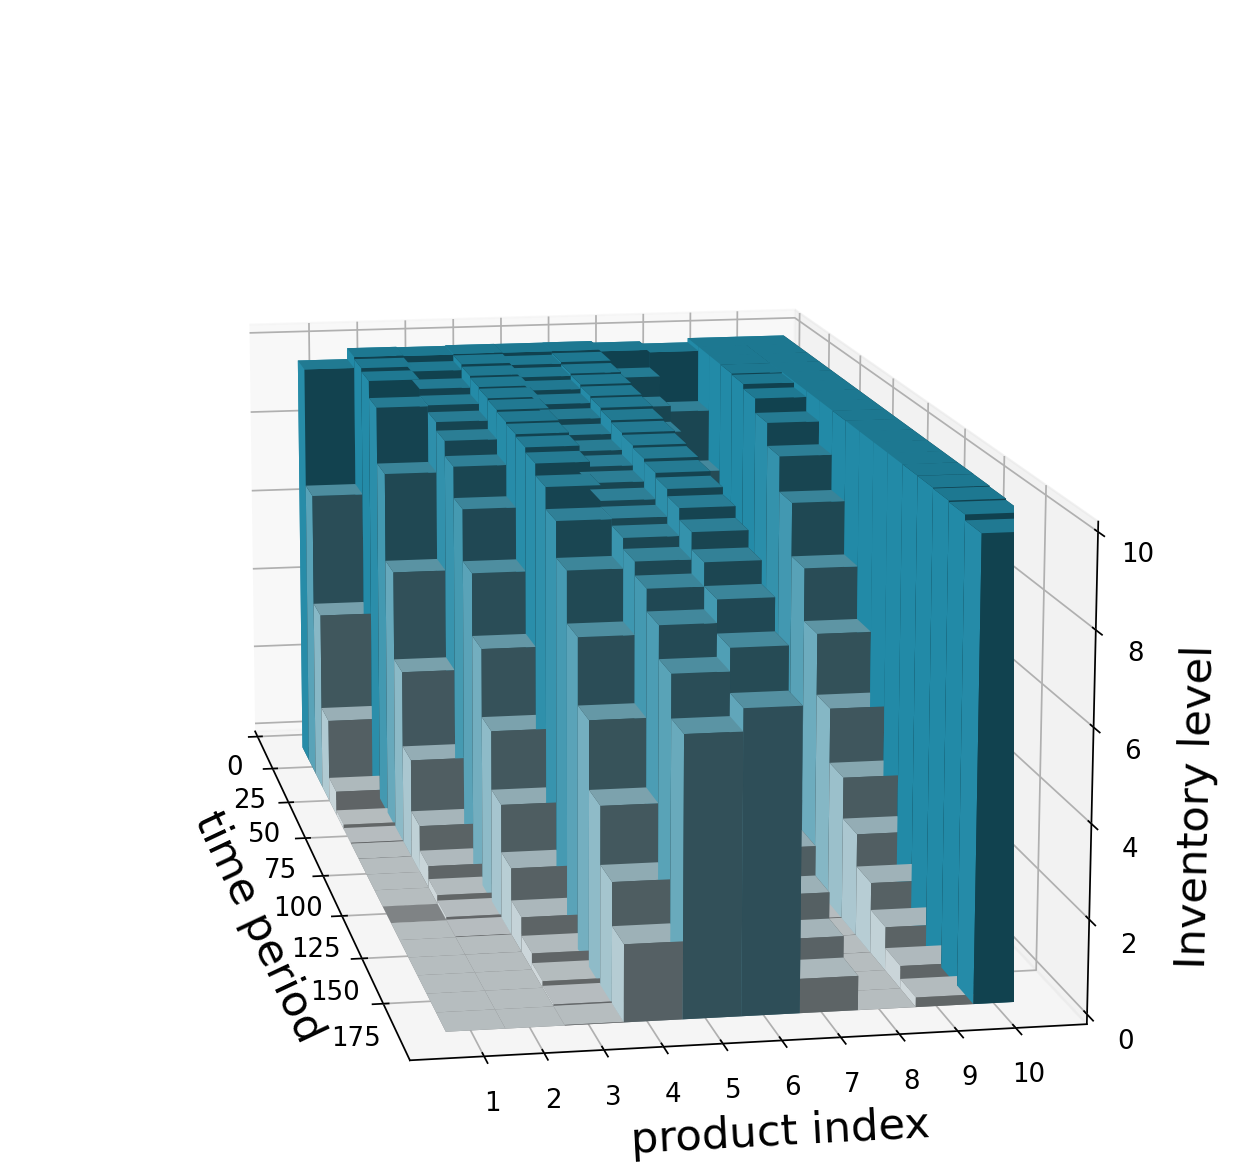

In [620]:
%matplotlib notebook
# 绘图设置
fig = plt.figure(figsize=(8,7.5))
ax = fig.add_subplot(projection = '3d')  # 三维坐标轴
# X和Y的个数要相同
X = list(range(1,change_of_invOA.T.shape[1]+1,10))
len_ = len(X)
Y = list(range(1,11))
# meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
xx, yy = np.meshgrid(X, Y)  # 网格化坐标
X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
# 设置柱子属性
depth = 1 # 柱子的长和宽
width = 10
#for i in range(10):
Z = change_of_invM.T[:,::10].ravel()
height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置2ca02c
# 颜色数组，长度和Z一致
c = ["#9467bd"]*len_+["#ff7f0e"]*len_+["#c20078"]*len_+["#c79fef"]*len_+\
["#1f77b4"]*len_+["#069af3"]*len_+["#13eac9"]*len_+["#7af9ab"]*len_+["#6b8ba4"]*len_+["#40a368"]*len_
# 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
color_ = []
for h in Z:
    color_.append(((238-h*20)/255,(246-h*9)/255,(249-h*6)/255))
ax.bar3d(X+15, Y-0.5, height, width, depth, Z,  color=color_, shade=True)  # width, depth, height

y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.set_xlim(0,200)
ax.tick_params(axis='x',labelsize=12,pad=1)
ax.tick_params(axis='y',labelsize=12,pad=0)
ax.tick_params(axis='z',labelsize=12,pad=0)
ax.set_ylim(0,11)
plt.xticks(np.arange(0,200,25))
plt.yticks(np.arange(1,11,1))
#拉伸轴的长度
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 1, 1, 1]))

ax.set_xlabel("time period",fontsize=20, labelpad=2)#labelpad用于调整标签到x轴之间的距离，越大则标签离轴越远
ax.set_ylabel("product index",fontsize=20, labelpad=0)
ax.set_zlabel("Inventory level",fontsize=20, labelpad=0)
plt.subplots_adjust(left=0)
ax.view_init(12, -10)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.savefig(r'change/'+'rl_InvM'+'.pdf', dpi=600, format='pdf')
plt.show()


<IPython.core.display.Javascript object>


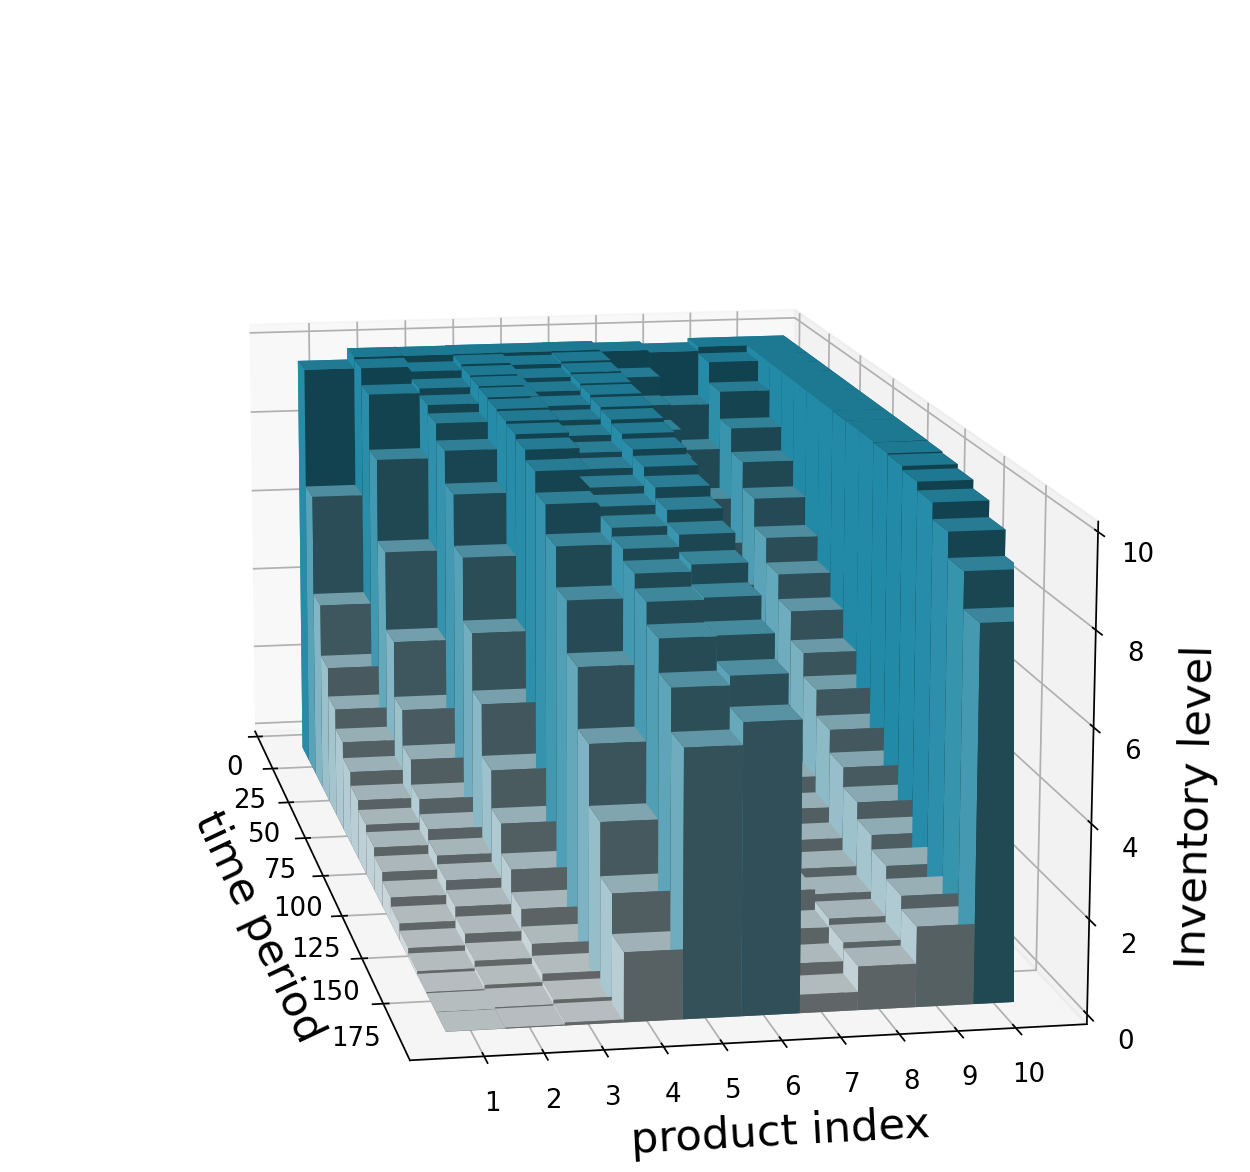

In [621]:
%matplotlib notebook
# 绘图设置
fig = plt.figure(figsize=(8,7.5))
ax = fig.add_subplot(projection = '3d')  # 三维坐标轴
# X和Y的个数要相同
X = list(range(1,change_of_invOA.T.shape[1]+1,10))
len_ = len(X)
Y = list(range(1,11))
# meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
xx, yy = np.meshgrid(X, Y)  # 网格化坐标
X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
# 设置柱子属性
depth = 1 # 柱子的长和宽
width = 10
#for i in range(10):
Z = change_of_invE.T[:,::10].ravel()
height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置2ca02c
# 颜色数组，长度和Z一致
c = ["#9467bd"]*len_+["#ff7f0e"]*len_+["#c20078"]*len_+["#c79fef"]*len_+\
["#1f77b4"]*len_+["#069af3"]*len_+["#13eac9"]*len_+["#7af9ab"]*len_+["#6b8ba4"]*len_+["#40a368"]*len_
# 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
color_ = []
for h in Z:
    color_.append(((238-h*20)/255,(246-h*9)/255,(249-h*6)/255))
ax.bar3d(X+15, Y-0.5, height, width, depth, Z,  color=color_, shade=True)  # width, depth, height

y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.set_xlim(0,200)
ax.tick_params(axis='x',labelsize=12,pad=1)
ax.tick_params(axis='y',labelsize=12,pad=0)
ax.tick_params(axis='z',labelsize=12,pad=0)
ax.set_ylim(0,11)
plt.xticks(np.arange(0,200,25))
plt.yticks(np.arange(1,11,1))
#拉伸轴的长度
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 1, 1, 1]))

ax.set_xlabel("time period",fontsize=20, labelpad=2)#labelpad用于调整标签到x轴之间的距离，越大则标签离轴越远
ax.set_ylabel("product index",fontsize=20, labelpad=0)
ax.set_zlabel("Inventory level",fontsize=20, labelpad=0)
plt.subplots_adjust(left=0)
ax.view_init(12, -10)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.savefig(r'change/'+'rl_InvE'+'.pdf', dpi=600, format='pdf')
plt.show()


<IPython.core.display.Javascript object>


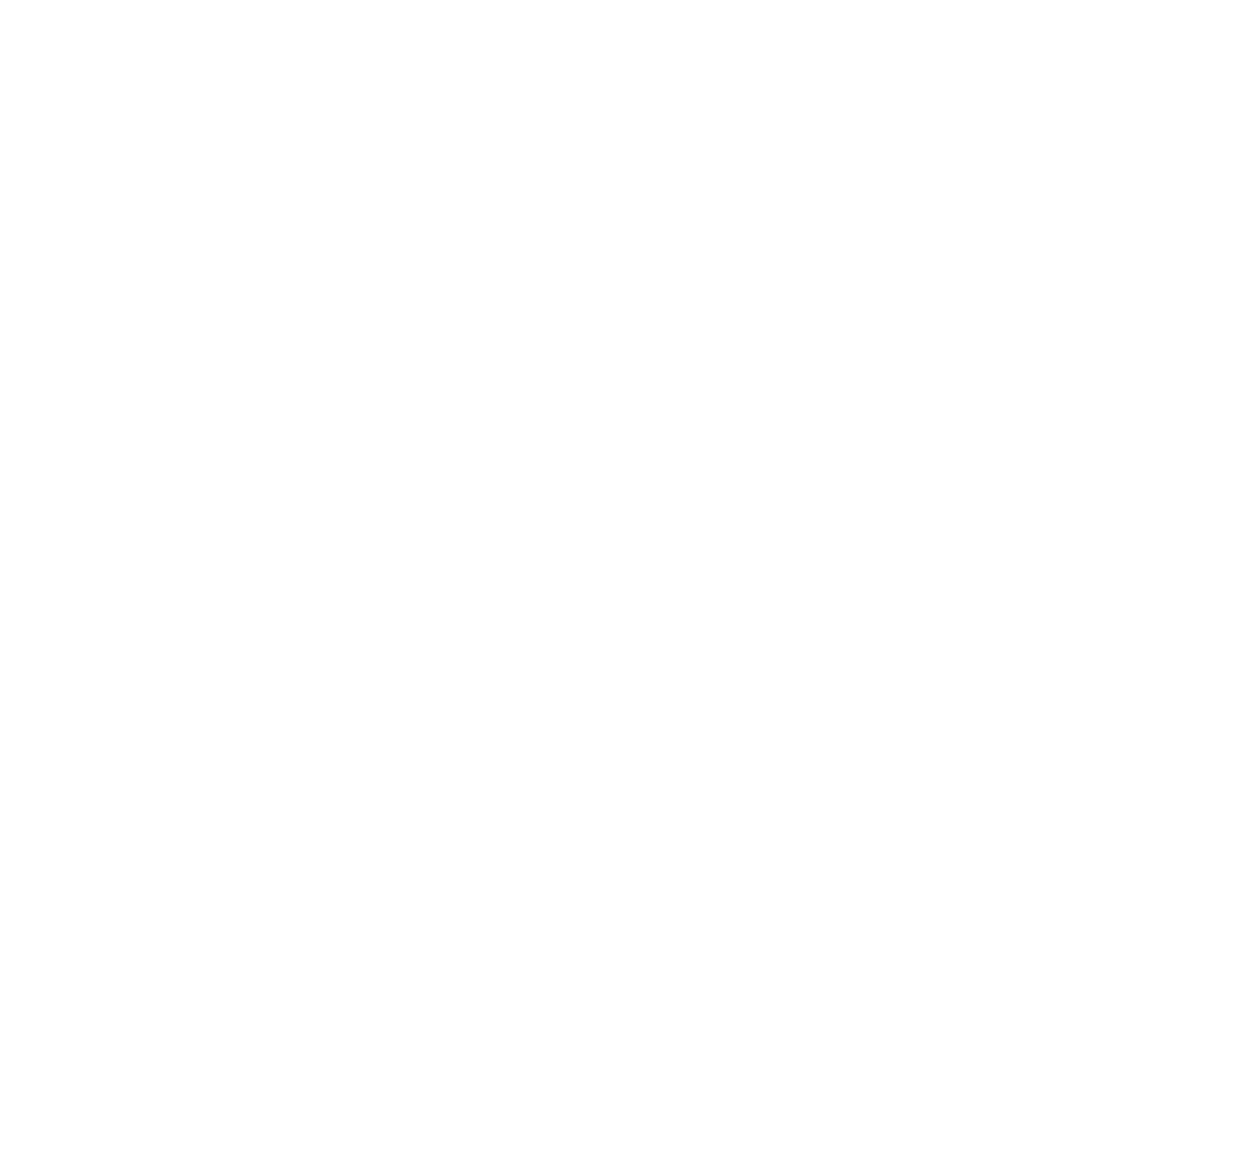

In [622]:
%matplotlib notebook
# 绘图设置
fig = plt.figure(figsize=(8,7.5))
ax = fig.add_subplot(projection = '3d')  # 三维坐标轴
# X和Y的个数要相同
X = list(range(1,change_of_invOA.T.shape[1]+1,10))
len_ = len(X)
Y = list(range(1,11))
# meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
xx, yy = np.meshgrid(X, Y)  # 网格化坐标
X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
# 设置柱子属性
depth = 1 # 柱子的长和宽
width = 10
#for i in range(10):
Z = change_of_invA2C.T[:,::10].ravel()
height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置2ca02c
# 颜色数组，长度和Z一致
c = ["#9467bd"]*len_+["#ff7f0e"]*len_+["#c20078"]*len_+["#c79fef"]*len_+\
["#1f77b4"]*len_+["#069af3"]*len_+["#13eac9"]*len_+["#7af9ab"]*len_+["#6b8ba4"]*len_+["#40a368"]*len_
# 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
color_ = []
for h in Z:
    color_.append(((238-h*20)/255,(246-h*9)/255,(249-h*6)/255))
ax.bar3d(X+15, Y-0.5, height, width, depth, Z,  color=color_, shade=True)  # width, depth, height

y_major_locator=MultipleLocator(1)#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
ax.set_xlim(0,200)
ax.tick_params(axis='x',labelsize=12,pad=1)
ax.tick_params(axis='y',labelsize=12,pad=0)
ax.tick_params(axis='z',labelsize=12,pad=0)
ax.set_ylim(0,11)
plt.xticks(np.arange(0,200,25))
plt.yticks(np.arange(1,11,1))
#拉伸轴的长度
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 1, 1, 1]))

ax.set_xlabel("time period",fontsize=20, labelpad=2)#labelpad用于调整标签到x轴之间的距离，越大则标签离轴越远
ax.set_ylabel("product index",fontsize=20, labelpad=0)
ax.set_zlabel("Inventory level",fontsize=20, labelpad=0)
plt.subplots_adjust(left=0)
ax.view_init(12, -10)#分别上下旋转和左右旋转，可以自己设置成一个比较好的参数
plt.savefig(r'change/'+'rl_InvA2C'+'.pdf', dpi=600, format='pdf')
plt.show()


<IPython.core.display.Javascript object>


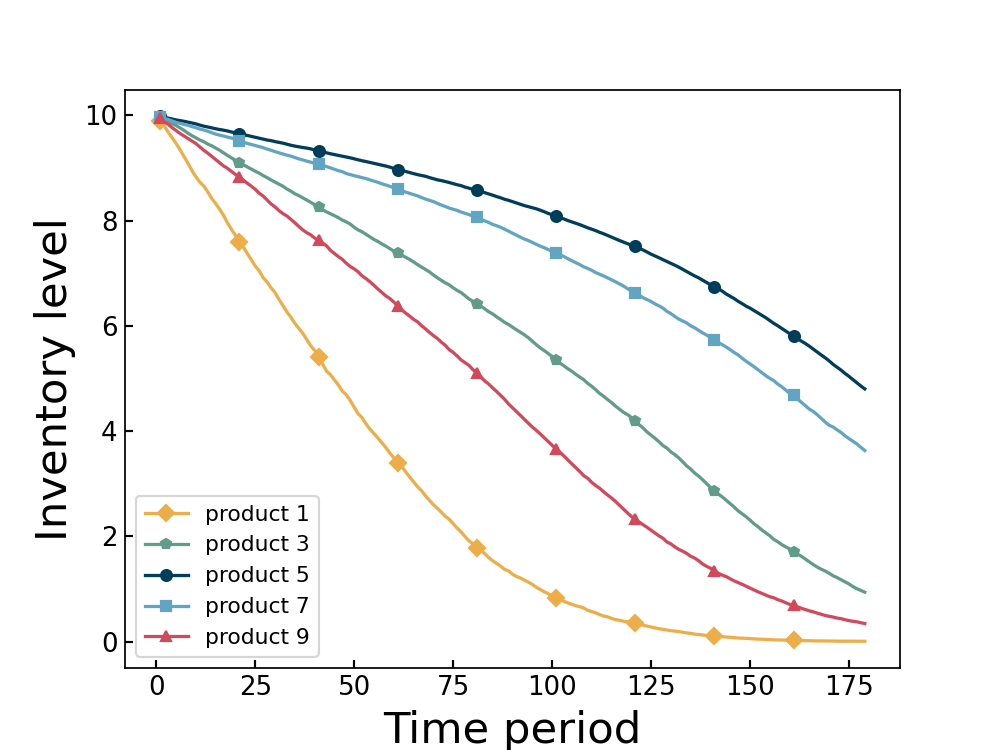

<IPython.core.display.Javascript object>


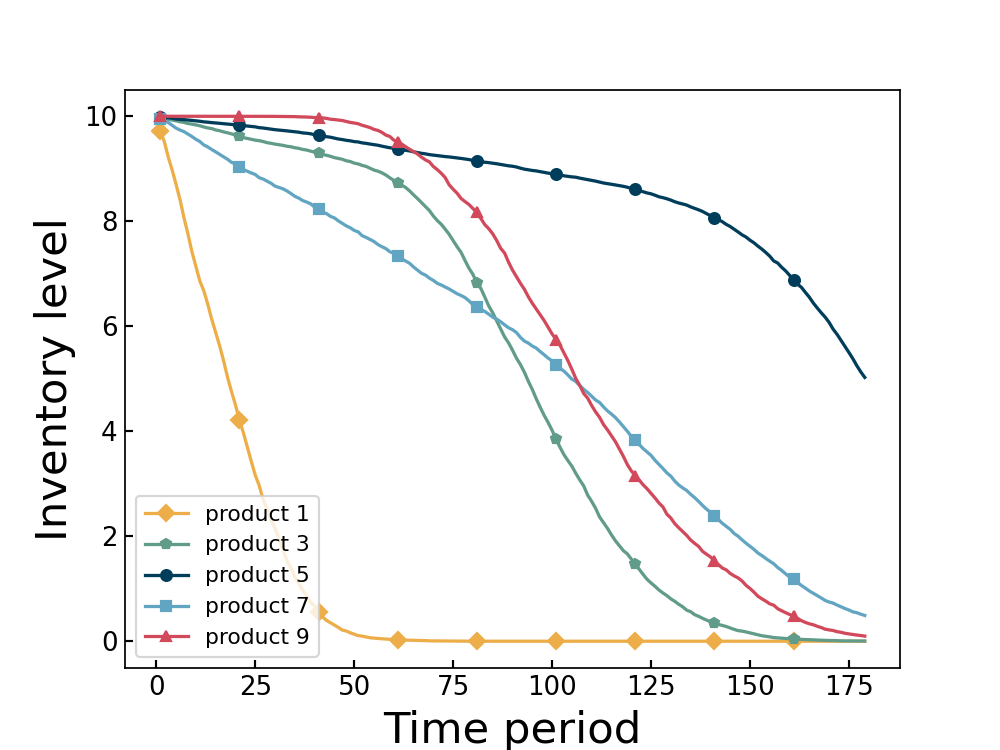

<IPython.core.display.Javascript object>


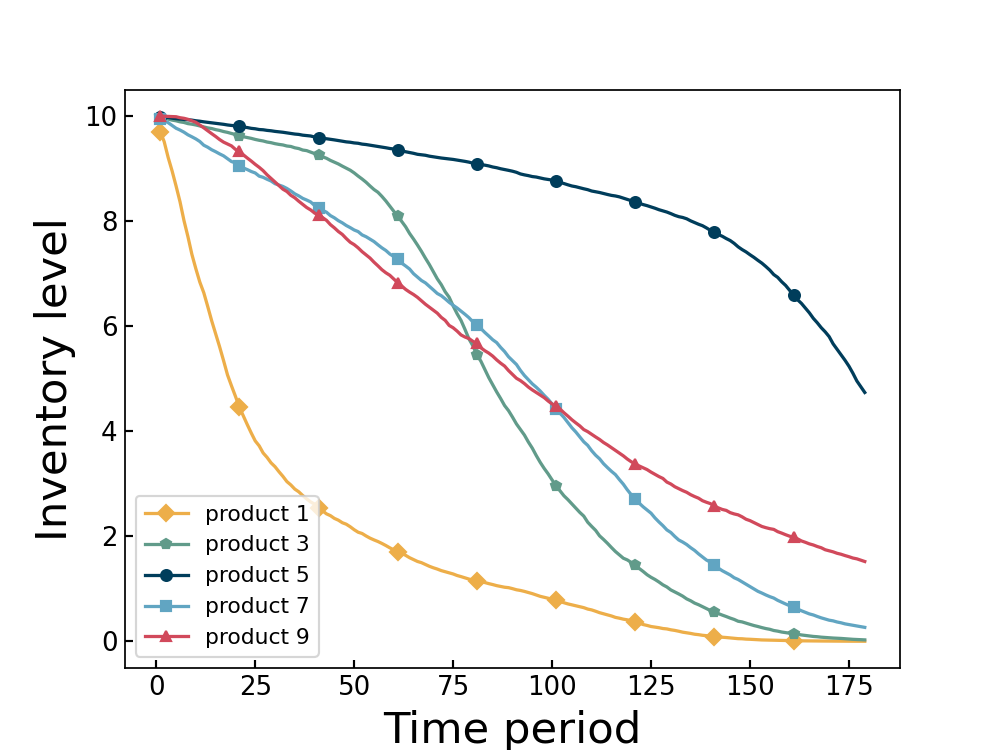

<IPython.core.display.Javascript object>


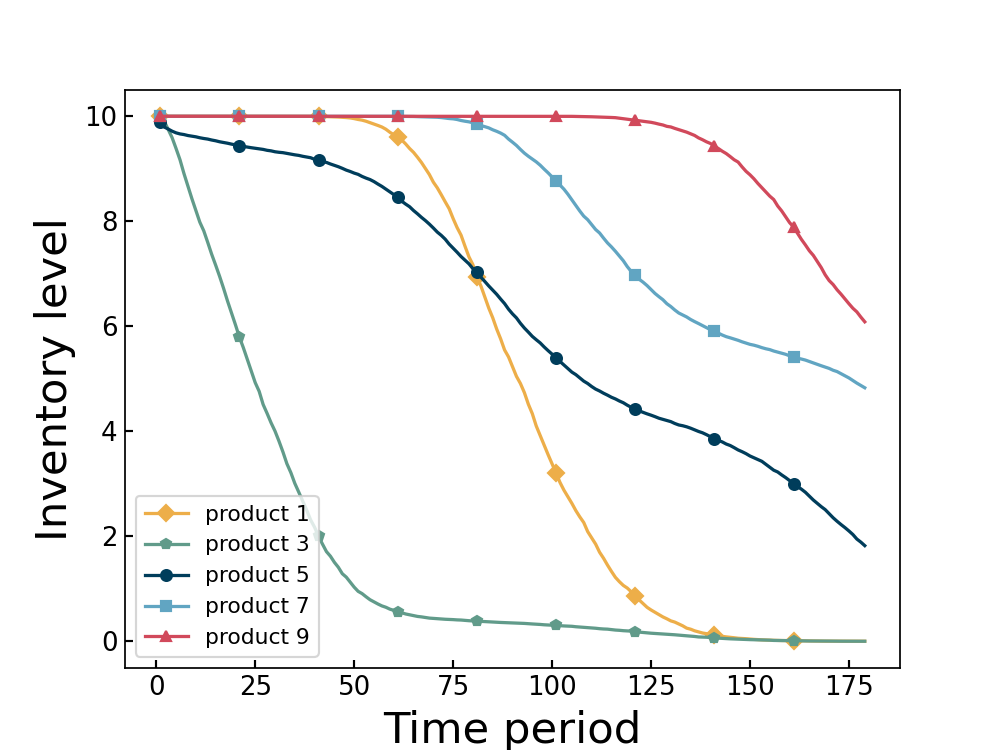

In [643]:
plt.figure()
ax = plt.gca().axes
color_list = ['#edae49', '#619b8a', '#003d5b','#61a5c2', '#d1495b']
#color_list = ['#264653', '#2a9d8f', '#e9c46a','#fb8500', '#bc4749']
for i,mark in zip([0,2,4,6,8],['D','p','o','s','^']):#,marker=mark
    color_rgb = (r/255, g/255, b/255)
    plt.plot(np.arange(1,178+2),change_of_invOA.T[i], markersize=5,marker=mark,markevery=20,color=color_list[int(i/2)],label='product '+str(i+1))
    #plt.fill_between(np.arange(1,178+2), change_of_invOA_min.T[i], change_of_invOA_max.T[i], alpha=0.1,color=color_list[int(i/2)])
#change_of_invA2C.T
plt.legend(loc='lower left')
plt.xlabel("Time period",size=20)
plt.ylabel('Inventory level',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
plt.savefig(r'change/'+'rl_InvOA2D'+'.pdf', dpi=600, format='pdf')
plt.show()


plt.figure()
ax = plt.gca().axes
color_list = ['#edae49', '#619b8a', '#003d5b','#61a5c2', '#d1495b']
#color_list = ['#264653', '#2a9d8f', '#e9c46a','#fb8500', '#bc4749']
for i,mark in zip([0,2,4,6,8],['D','p','o','s','^']):#,marker=mark
    color_rgb = (r/255, g/255, b/255)
    plt.plot(np.arange(1,178+2),change_of_invM.T[i], markersize=5,marker=mark,markevery=20,color=color_list[int(i/2)],label='product '+str(i+1))
    #plt.fill_between(np.arange(1,178+2), change_of_invOA_min.T[i], change_of_invOA_max.T[i], alpha=0.1,color=color_list[int(i/2)])
#change_of_invA2C.T
plt.legend(loc='lower left')
plt.xlabel("Time period",size=20)
plt.ylabel('Inventory level',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
plt.savefig(r'change/'+'rl_InvM2D'+'.pdf', dpi=600, format='pdf')
plt.show()


plt.figure()
ax = plt.gca().axes
color_list = ['#edae49', '#619b8a', '#003d5b','#61a5c2', '#d1495b']
#color_list = ['#264653', '#2a9d8f', '#e9c46a','#fb8500', '#bc4749']
for i,mark in zip([0,2,4,6,8],['D','p','o','s','^']):#,marker=mark
    color_rgb = (r/255, g/255, b/255)
    plt.plot(np.arange(1,178+2),change_of_invE.T[i], markersize=5,marker=mark,markevery=20,color=color_list[int(i/2)],label='product '+str(i+1))
    #plt.fill_between(np.arange(1,178+2), change_of_invOA_min.T[i], change_of_invOA_max.T[i], alpha=0.1,color=color_list[int(i/2)])
#change_of_invA2C.T
plt.legend(loc='lower left')
plt.xlabel("Time period",size=20)
plt.ylabel('Inventory level',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
plt.savefig(r'change/'+'rl_InvE2D'+'.pdf', dpi=600, format='pdf')
plt.show()


plt.figure()
ax = plt.gca().axes
color_list = ['#edae49', '#619b8a', '#003d5b','#61a5c2', '#d1495b']
#color_list = ['#264653', '#2a9d8f', '#e9c46a','#fb8500', '#bc4749']
for i,mark in zip([0,2,4,6,8],['D','p','o','s','^']):#,marker=mark
    color_rgb = (r/255, g/255, b/255)
    plt.plot(np.arange(1,178+2),change_of_invA2C.T[i], markersize=5,marker=mark,markevery=20,color=color_list[int(i/2)],label='product '+str(i+1))
    #plt.fill_between(np.arange(1,178+2), change_of_invOA_min.T[i], change_of_invOA_max.T[i], alpha=0.1,color=color_list[int(i/2)])
#change_of_invA2C.T
plt.legend(loc='lower left')
plt.xlabel("Time period",size=20)
plt.ylabel('Inventory level',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
plt.savefig(r'change/'+'rl_InvA2C2D'+'.pdf', dpi=600, format='pdf')
plt.show()

<IPython.core.display.Javascript object>


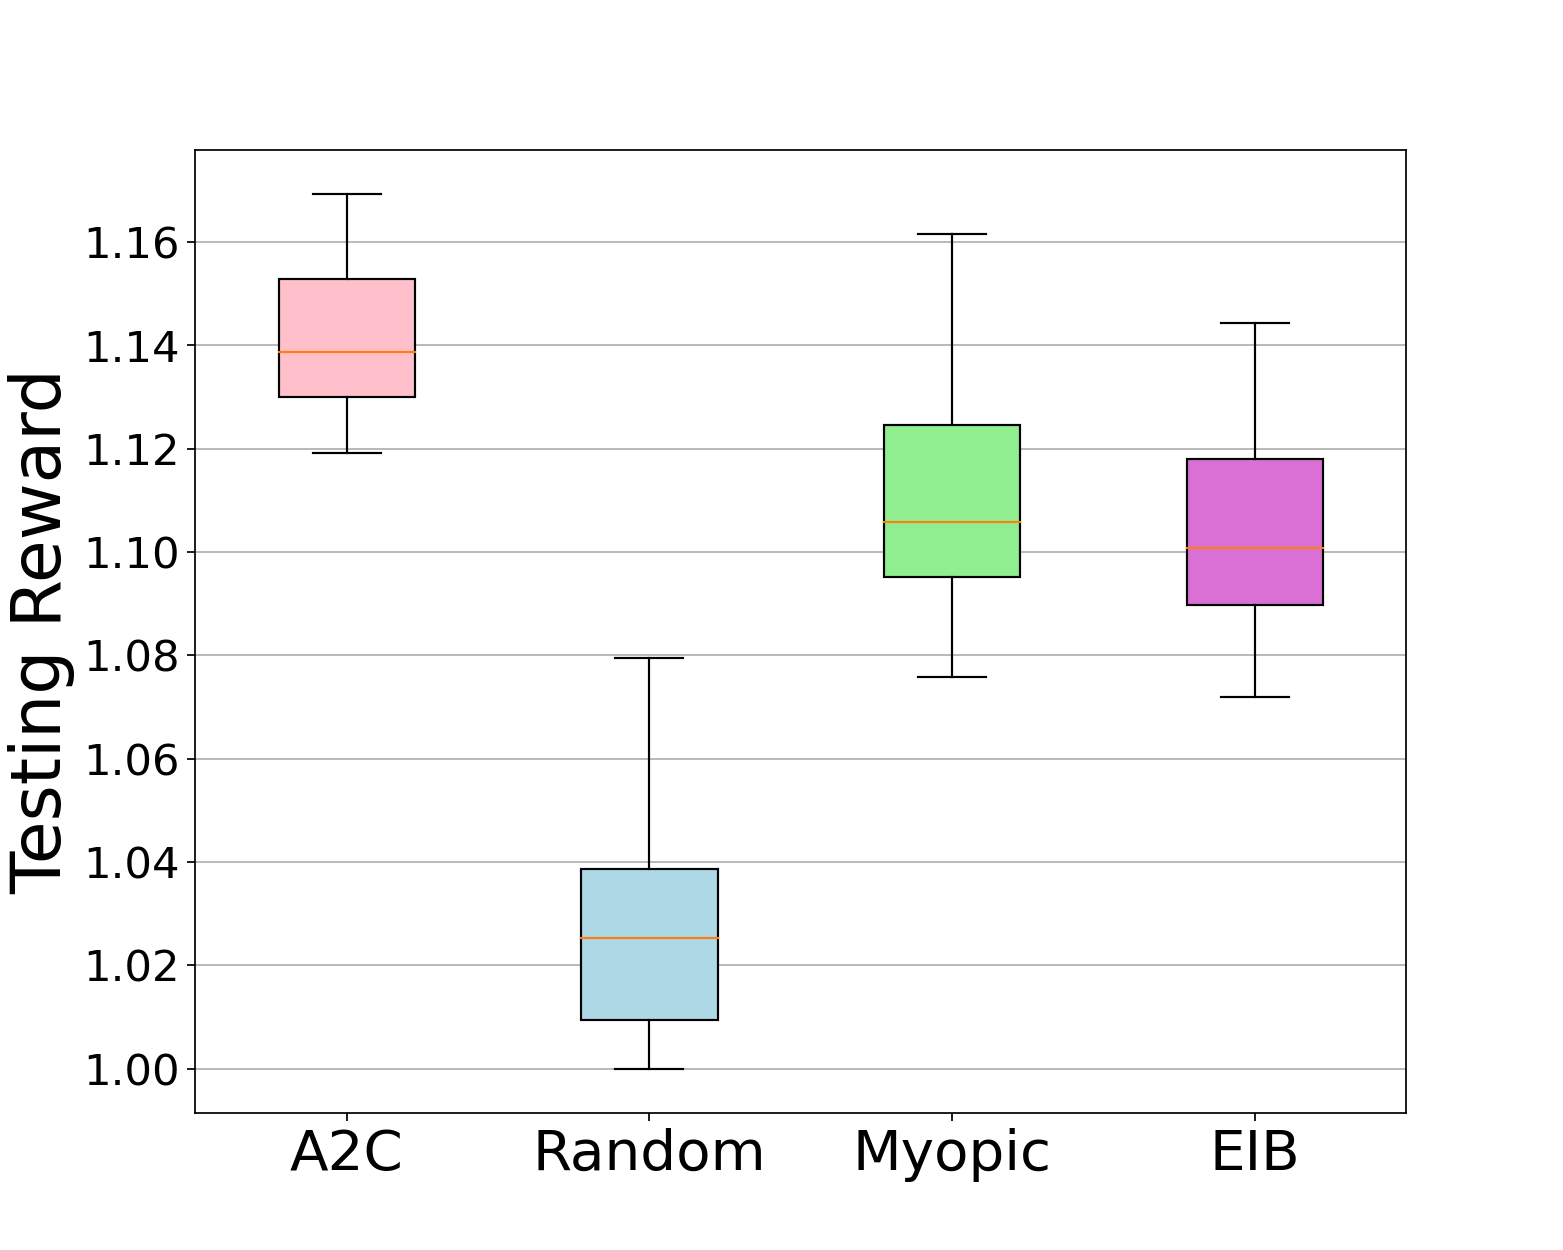

In [659]:
import matplotlib.ticker as mtick
#看benchmark的平均表现
with open(r'log/' + 'A2C2022-12-12-17-13-04', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

with open(r'log/' + 'A2C2022-12-17-18-44-56', 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-7:]))
min_ = np.min(OA_list)  
data = [np.array(seller_list)/min_, np.array(OA_list)/min_,
                np.array(Myopic_list)/min_, np.array(EIB_list)/min_]

labels = ['A2C', 'Random', 'Myopic', 'EIB']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
# ax1.set_title('Rectangular box plot')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
y_major_locator=MultipleLocator(0.02)
#ax1.set_ylim(0.98,1.2)
ax1.yaxis.set_major_locator(y_major_locator)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'orchid']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax1.yaxis.grid(True)
plt.ylabel('Testing Reward',size=32)
plt.tick_params(axis='x',labelsize=26)
plt.tick_params(axis='y',labelsize=20)
fig.savefig(r'plot/'+'rlA2C2022-12-17-18-44-56'+'.pdf',dpi=600, format='pdf')            
plt.show()
